# Livrable 2: Algorithme Avancée
**Groupe:** Mohamed Amine EL BAH, Ahmad ZIAB, Sarah KOMBAR

---

<center>
    <img src="https://s3-eu-west-1.amazonaws.com/assets.atout-on-line.com/images/ingenieur/Logos_Ecoles/2022_2025/cesi-300.jpg" alt="logo CESI">

## Résumé

Dans le livrable précédent, nous avons déterminé le problème à résoudre et nous avons déterminé formellement sa classe de complexité.

##Introduction

L'Agence de l'Environnement et de la Maitrise de l'Energie (ADEME) a lancé un appel à manifestation d'intérêt afin de trouver de nouvelles solutions de mobilités adaptées à differents types de territoires et des éléments à transporter. Notre équipe à CesiCDP offront notre propre solution sur la gestion de tournées de livraison. Comment pouvons nous concevoir un programmme capable de résoudre ce problème ?

Nous allons d'abord énoncer le problème que nous cherchons à résoudre puis nous allons déterminer sa classe de complexité pour déterminer les méthodes à utiliser. Ensuite, nous présenterons des algorithmes capables de résoudre le problème et nous les implémenterons. Enfin, nous allons conduire une étude statistique afin de déterminer comment fonctionnent ces programmes avec le problème et nous comparerons les différentes approches

## Définition du Problème

Nous cherchons à determiner le chemin le plus court qui permettra de parcourrir toutes les villes et de revenir au point de départ. Cela revient à résoudre le problème de Voyageur de Commerce Incomplet.

**Problème du voyageur de commerce**

Étant donné n villes et leurs distances par paire, le problème du voyageur s'agit de déterminer le chemin le plus petit qui passe exactement une fois par chaque ville et revienne à la ville de départ [1]. Il peut être modélisé à l’aide d’un graphe constitué d’un ensemble de sommets et d’un ensemble d’arêtes. Chaque sommet représente une ville, une arête symbolise le passage d’une ville à une autre, et on lui associe un poids pouvant représenter une distance, un temps de parcours ou encore un coût.

Ci-contre, un exemple de graphe à 4 sommets.

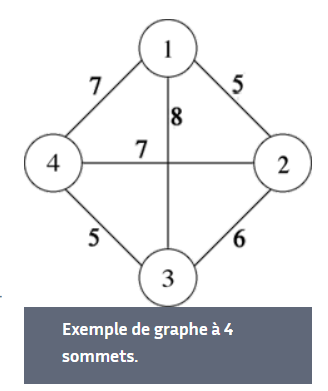

Figure 1: Exemple d'un graphe complet pondéré [2]

Résoudre le problème du voyageur de commerce revient à trouver un cycle Hamiltonien qui soit de longueur minimale. Un cycle Hamiltonien est un cycle qui passe une et une seule fois par chaque sommet du graphe [3]. Pour le graphe ci-contre, une solution à ce problème serait le cycle 1, 2, 3, 4 et 1, correspondant à une distance totale de 23. Cette solution est optimale, il n’en existe pas de meilleure.

Nous chercherons donc à résoudre ce problème au long de ce projet. Cependant, afin d'améliorer l'expérience du client dans sa reception de son paquet, nous pouvons ajouter une contrainte au problème énoncé précédemment: Pour chaque objet, nous imposons une fenêtre de livraison. Nous plaçons une intervalle à chaque ville où le temps pris pour y arriver doit y etre compris. Nous permettrons d'attendre à une ville si le temps pris n'est pas assez long pour rentrer dans l'intervalle de la ville et nous prenons en compte l'intervalle de la ville uniquement la première fois que nous la visitons.

Afin de pouvoir trouver une méthode de résolution adaptée au problème, nous devons d'abord trouver la classe de complexité du problème.


## Preuve de Complexité

Afin d'énoncer ce problème, nous allons modéliser une instance à un graphe connexe pondéré. Chaque sommet i est associé à une intervalle $ F_i $ qui correspond à la fenetre de livraison. Pour faciliter la formulation, nous posons, avec n le nombre de sommets dans le graphe d'entrée: $ k_{i∈[1,n]}∈ R^n $ la somme du poids des aretes pris pour arriver au sommet i.

Nous pouvons donc décrire ce problème de cette façon :

**Enoncé** : Quel est le cycle Hamiltonien de plus petit poids tel que pour tout sommet i, $ k_i∈ F_i ?$

Nous pouvons énoncer ce problème d’optimisation comme un problème de décision défini ainsi :

**Enoncé** : Existe-t-il un cycle hamiltonien S tel que la somme des poids des arrêtes parcourues est infèrieure à k et que pour tout sommet i, $ k_i∈ F_i ?$

**Données** :
- Un graphe complet G = (V, E)
- Une fonction de poids de E dans N
- Un entier k
- Une fonction qui donne une intervalle pour chaque élément dans V.

Pour le résoudre, nous posons cet algorithme:

**Algorithme** :
- Tout sommet de V sont présents une et une seule fois dans S.
- Toutes les arêtes dans S appartiennent à V.
- Pour tout sommet i, $ k_i∈ F_i $.
- Le sommet de départ et de fin sont les même dans S.
- La somme des poids des arêtes est inférieur ou égale à k.

Toutes les opérations détaillées dans l’algorithme s’exécutent en temps constant. Cependant, nous nécessitons de faire les trois premières opérations sur tous les sommets de la chaine S. Celle-ci, dans le pire des cas, est le nombre de sommet dans le graphe de départ. La complexité est donc O(n) avec n le nombre de sommets dans le graphe; le problème est NP.

D’autre part, nous pouvons réduire le problème du Cycle Hamiltonien à notre problème.

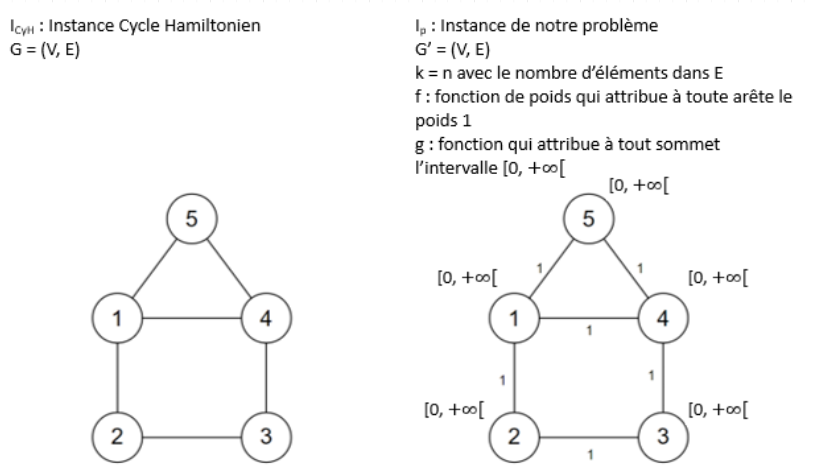

Figure 2: Exemple de réduction polynomiale du Cycle Hamiltonien à Notre Problème

Nous supposons que la réponse est vraie pour $I_p$ : Il existe un cycle Hamiltonien dans G’. Or G’ = G donc il existe un cycle Hamiltonien dans G: c’est vrai pour $I_{CyH}$.
Nous supposons que la réponse est fausse pour Ip : Il y a trois possibilités :
-	Il n’existe pas de cycle Hamiltonien dans G’. Or G’ = G donc il n’existe pas de cycle Hamiltonien dans G. La réponse est donc fausse pour $I_{CyH}$.
-	Il existe au moins un cycle Hamiltonien dont la somme du poids de ses arrêtes est strictement supérieur à k dans G’. Or le poids de chaque arête est 1 donc le cycle passe par plus de k arêtes. Cependant, k = n avec n le nombre arêtes et un cycle hamiltonien est un cycle de longueur n [4]. Ceci est donc impossible, si Ip est faux donc il n’existe pas de cycle Hamiltonien dans G’. Nous revenons au cas précédant déjà prouvé.
- Il existe au moins un cycle Hamiltonien dont au moins un de ses $k_i$ n'appartiennent pas à l'intervalle du sommet i. Or, avec le choix des intervalles et des poids ceci est impossible. Nous revenons au premier cas déjà prouvé.

S’il existait un algorithme capable de résoudre polynomialement notre problème, nous pourrons l’utiliser pour résoudre polynomialement le Cycle Hamiltonien. Donc, Cycle Hamiltonien ⩽ Notre Problème. Or le Cycle Hamiltonien est NP-Difficile [5], donc Notre Problème est NP-Difficile.

Comme Notre Probleme est dans NP donc il est NP-Complet.


## Algorithmes de résolution


Notre problème est NP-Complet, il est peu probable qu'il puisse etre résolu par un algorithme polynomial. Pour trouver des solutions aux problèmes NP-Complet, nous nous orientons vers les heuristiques et les métaheuristiques.


### Définition heuristique
Une heuristique est une méthode de calcul qui fournit rapidement une solution réalisable, pas nécessairement optimale ou exacte, pour un problème d'optimisation difficile. C'est un concept utilisé entre autres en optimisation combinatoire, en théorie des graphes, en théorie de la complexité des algorithmes, en intelligence artificielle, dans la programmation des jeux (comme les échecs ou go), dans la primalité des nombres entiers et dans la démonstration de théorème.

Une heuristique s'impose quand les algorithmes de résolution exacte sont impraticables, à savoir de complexité polynomiale de haut degré, exponentielle ou plus. Généralement, une heuristique est conçue pour un problème particulier, en s'appuyant sur sa structure propre, mais il existe des approches fondées sur des principes généraux.

Nous parlons de métaheuristique pour les méthodes approximatives générales, pouvant s'appliquer à différents problèmes (comme le recuit simulé par exemple).[6]

### Définition métaheuristique
Une métaheuristique est un algorithme d’optimisation visant à résoudre des problèmes d’optimisation difficiles pour lesquels on ne connaît pas de méthode classique plus efficace.

Les métaheuristiques sont généralement des algorithmes stochastiques itératifs, qui progressent vers un optimum global. Elles se comportent comme des algorithmes de recherche, tentant d’apprendre les caractéristiques d’un problème afin d’en trouver une approximation de la meilleure solution. Il existe un grand nombre de métaheuristiques différentes, allant de la simple Recherche Locale à des algorithmes complexes de recherche globale. Ces méthodes utilisent cependant un haut niveau d’abstraction, leur permettant d’être adaptées à une large gamme de problèmes différents. En d’autres termes, ces algorithmes se veulent des méthodes génériques pouvant optimiser une large gamme de problèmes différents, sans nécessiter de changements profonds dans l’algorithme employé.

• Les métaheuristiques sont des stratégies permettant de guider la recherche d’une solution optimale.

• Le but visé par les métaheuristiques est d’explorer l’espace de recherche efficacement afin de déterminer des solutions (presque) optimales.

• Les techniques qui constituent des algorithmes de type métaheuristique vont de la simple procédure de Recherche Locale à des processus d’apprentissage complexes.

• Les métaheuristiques sont en général non-déterministes et ne donnent aucune garantie d’optimalité.

• Les métaheuristiques peuvent contenir des mécanismes qui permettent d’éviter d’être bloqué dans des régions de l’espace de recherche.

• Les concepts de base des métaheuristiques peuvent être décrit de manière abstraite, sans faire appel à un problème spécifique.

• Les métaheuristiques peuvent faire appel à des heuristiques qui tiennent compte de la spécificité du problème traité, mais ces heuristiques sont contrôlées par une stratégie deniveau supérieur.

• Les métaheuristiques peuvent faire usage de l’expérience accumulée durant la recherche
de l’optimum, pour mieux guider la suite du processus de recherche. [7]

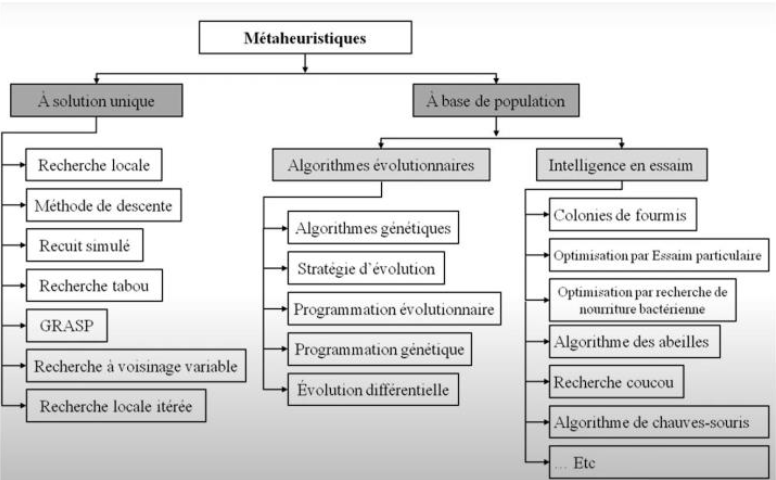

Figure 3 : Types des algorithmes métaheuristiques

Nous allons tenter de trouver les solutions aux problèmes en utilisant deux algorithmes différents: Hill Climbing et Colonie de Fourmis.

### Algorithme heuristique : Hill Climbing




Le Hill Climbing est un algorithme d'optimisation simple utilisé en Intelligence Artificielle (IA) pour trouver la meilleure solution possible à un problème donné. Il appartient à la famille des algorithmes de recherche locale et est souvent utilisé dans des problèmes d'optimisation où l'objectif est de trouver la meilleure solution parmi un ensemble de solutions possibles.

Dans le Hill Climbing, l'algorithme commence avec une solution initiale, puis apporte itérativement de petites modifications pour améliorer la solution. Ces modifications sont basées sur une fonction heuristique qui évalue la qualité de la solution. L'algorithme continue de faire ces petites modifications jusqu'à ce qu'il atteigne un maximum local, ce qui signifie qu'aucune amélioration supplémentaire ne peut être apportée avec l'ensemble de mouvements actuel.

Il existe plusieurs variantes du Hill Climbing, notamment le Hill Climbing par ascension la plus raide, le Hill Climbing par premier choix et le recuit simulé. Dans le Hill Climbing par ascension la plus raide, l'algorithme évalue tous les mouvements possibles à partir de la solution actuelle et sélectionne celui qui conduit à la meilleure amélioration. Dans le Hill Climbing par premier choix, l'algorithme sélectionne aléatoirement un mouvement et l'accepte s'il conduit à une amélioration, indépendamment du fait qu'il s'agisse du meilleur mouvement. Le recuit simulé est une variation probabiliste du Hill Climbing qui permet à l'algorithme d'accepter occasionnellement des mouvements moins bons afin d'éviter de se retrouver coincé dans des maxima locaux.

Le Hill Climbing peut être utile dans une variété de problèmes d'optimisation, tels que la planification des horaires, la planification d'itinéraires et l'allocation de ressources. Cependant, il présente certaines limites, comme la tendance à se retrouver coincé dans des maxima locaux et le manque de diversité dans l'espace de recherche. Par conséquent, il est souvent combiné avec d'autres techniques d'optimisation, telles que les algorithmes génétiques ou le recuit simulé, pour surmonter ces limitations et améliorer les résultats de la recherche.

**Avantages de l'algorithme de Hill Climbing :**

* Le Hill Climbing est un algorithme simple et intuitif, facile à comprendre et à mettre en œuvre.
* Il peut être utilisé dans une grande variété de problèmes d'optimisation, y compris ceux avec un espace de recherche vaste et des contraintes complexes.
* Le Hill Climbing est souvent très efficace pour trouver des optima locaux, ce qui en fait un bon choix pour les problèmes où une bonne solution est nécessaire rapidement.
* L'algorithme peut être facilement modifié et étendu pour inclure des heuristiques ou des contraintes supplémentaires.

**Inconvénients de l'algorithme de Hill Climbing :**

* Le Hill Climbing peut se retrouver coincé dans des optima locaux, ce qui signifie qu'il peut ne pas trouver l'optimum global du problème.
* L'algorithme est sensible au choix de la solution initiale, et une mauvaise solution initiale peut conduire à une mauvaise solution finale.
* Le Hill Climbing n'explore pas très exhaustivement l'espace de recherche, ce qui peut limiter sa capacité à trouver de meilleures solutions.
* Il peut être moins efficace que d'autres algorithmes d'optimisation, tels que les algorithmes génétiques ou le recuit simulé, pour certains types de problèmes.[8]

**Exemple de Hill Climbing en Python**

In [621]:
def hill_climbing(f, x0):
    x = x0  # initial solution
    while True:
        neighbors = generate_neighbors(x)  # generate neighbors of x
        # find the neighbor with the highest function value
        best_neighbor = max(neighbors, key=f)
        if f(best_neighbor) <= f(x):  # if the best neighbor is not better than x, stop
            return x
        x = best_neighbor  # otherwise, continue with the best neighbor

### Algorithme métaheuristique : Colonies de fourmis

L’optimisation par colonies de fourmis (Ant Colony Optimisation) est une méthode évolutive inspirée du comportement des fourmis à la recherche de nourriture. Cette méthode utilise leur comportement afin de parcourrir un graphe. En effet, les fourmis sont capables de déterminer le chemin le plus court entre leur nid et une source de nourriture. Ceci est possible grâce à la phéromone, une substance que les fourmis déposent sur le sol lorsqu’elles de déplacent. Lorsqu’une fourmi doit choisir entre deux directions, elle choisit avec une plus grande probabilité celle comportant une plus forte concentration de phéromone. C’est ce processus coopératif qu’on tente d’imiter. Chaque fourmi
est un algorithme constructif qui génère des solutions. Soit D(s) l’ensemble des décisions possibles que peut prendre une fourmi pour compléter une solution partielle. La décision du D(s) qu’elle choisira dépendra de deux facteurs, à savoir la force gloutonne et la trace :

• la force gloutonne est une valeur ηd(s) qui représente l’intérêt qu’a la fourmi à prendre la décision d étant donnée la solution partielle s.

 En général, cette valeur est proportionnelle à la qualité de la nouvelle solution partielle obtenue en prenant la décision d.

• la trace τd représente l’intérêt historique qu’a la fourmi de prendre la décision d. Plus cette
quantité est grande, plus il a été intéressant dans le passé de prendre cette décision.
Étant donné un paramètre α 2 R+ qui donne plus ou moins d’importance à la trace, la fourmi
va prendre la décision d avec une probabilité p(s; d) définie comme suit :

 \\
$$
p(s, d) = \frac{\eta_d(s) \tau_d^{\alpha}}{\sum_{e \in D(s)} \eta_e(s) \tau_e^{\alpha}}
$$

Lorsqu’une fourmi a complété la construction de sa solution, elle laisse une trace sur le chemin emprunté. Cette trace est proportionnelle à la qualité de la solution construite. Un processus d’évaporation de la trace permet d’oublier les choix réalisés dans un lointain passé et de donner plus d’importance aux choix réalisés plus récemment. Plus précisément, soit ρ $ \in $ ]0; 1[ un paramètre d’évaporation, soit A l’ensemble des fourmis, et soit f(a) la valeur de la solution produite par la fourmi a $ \in $ A. La qualité de la solution produite par la fourmi a est donc inversement proportionnelle à f(a). La mise à jour de la trace sur la décision d est réalisée comme suit :

 \\
$$
\tau_d = (1 - \rho) \tau_d + c \sum_{a \in A} \Delta_d(a)
$$

où  $ C ∈ R_+$ est une constante et $Delta_d(a)$ =

 \\
\begin{cases}
\frac{1}{f(a)} & \text{si la fourmi } a \text{ a réalisé le choix } d \\
0 & \text{sinon}
\end{cases}


Le pseudo-code et les caractéristiques d'une optimisation par colonies de fourmis est ci-dessous (p.11 [9]), (p.5-6 [10]) :

Poser $\tau_d \leftarrow 0$ pour toute décision $d$ possible; \\

  **Tant que** aucun critère d’arrêt n’est satisfait faire \\
  * Construire $|A|$ solutions en tenant compte de la force gloutonne et de la trace; \\
  * Mettre à jour les traces $\tau_d$ ainsi que la meilleure solution rencontrée;

**Fin du tant que**

Types d’individus : solutions admissibles obtenues à l’aide d’un algorithme constructif ;

Type d’évolution : remplacement générationnel avec une population de taille constante ;

Structure de voisinage : population non structurée ;

Sources d’information : historique de la recherche (mémorisé dans la trace) ;

Irréalisabilité : l’algorithme constructif ne produit pas de solution non admissible ;

Intensification : augmentation des phéromones ou diminution du taux d'évaporation ;

Diversification : diminution des phéromones ou augmentation du taux d'évaporation.

Cet algorithme peut être amélioré de diverses manières. Nous avons tenté de le faire en diversifiant les solutions possibles en permettant chaque fourmis de commencer d'un différent sommet.

## Méthode de résolution

Avant de passer à la résolution, nous installons les modules nécessaires pour le reste du projet. Nous définissons également une fonction qui génère les instances du problème.

In [622]:
import random
import numpy as np
import random
import matplotlib.pyplot as plt
import time
import statistics
from ipywidgets import IntProgress
from IPython.display import display
from collections import deque

Cet algorithme prends le nombre de sommets, le poids maximum qui peut etre attribué à une arete, et les bornes minimale et maximale les plus petites et plus grandes possibles respectivement pour les intervalles. Le programme créé d'abord un abre couvrant afin d'assurer que le graphe soit connexe puis attribue des aretes aléatoirement. Enfin, il attribue les intervalles au sommets.

Les instances envoyées sont sous forme d'une matrice d'adjacence avec les poids dans les aretes ($ i \in R $ pour les aretes existantes, inf sinon) avec un dictionnaire ayant comme clés les sommets et comme valeur les intervalles associées.

In [623]:
# Générer le graphe TSP incomplet à intervalles
def generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup):

    # Initialisation de la matrice de poids avec des valeurs infinies
    matrice = [[float('inf') for _ in range(num_sommets)] for _ in range(num_sommets)]

    # Initialisation des intervalles
    intervalles = {}

    # Création des intervalles
    for i in range(num_sommets):
        intervalle_start = random.randint(0, max_intervalle_inf)
        intervalle_end = intervalle_start + random.randint(max_intervalle_inf, max_intervalle_sup)
        intervalles[i] = (intervalle_start, intervalle_end)

    # Création d'un arbre couvrant minimal (MST)
    connected = set([0])
    edges = []

    while len(connected) < num_sommets:
        min_edge = (None, None, float('inf'))
        for u in connected:
            for v in range(num_sommets):
                if v not in connected and u != v:
                    poids = random.randint(1, max_poids_arete)
                    if poids < min_edge[2]:
                        min_edge = (u, v, poids)
        u, v, poids = min_edge
        if u is not None and v is not None:
            matrice[u][v] = poids
            matrice[v][u] = poids
            connected.add(v)
            edges.append((u, v, poids))

    # Ajouter des arêtes supplémentaires de manière aléatoire
    for i in range(num_sommets):
        for j in range(i + 1, num_sommets):
            if matrice[i][j] == float('inf') and random.choice([True, False]):
                poids = random.randint(1, max_poids_arete)
                matrice[i][j] = poids
                matrice[j][i] = poids

    return np.array(matrice), intervalles

Par exemple, nous avons :

In [624]:
#Variables nécessaires
num_sommets = 5
max_poids_arete = 10
max_intervalle_inf = 1
max_intervalle_sup = 100

# Génération des données
tsp_matrice, tsp_intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup)

# Afficher la matrice
print("\nMatrice d'adjacence:")
for row in tsp_matrice:
    print(row)

# Afficher les intervalles
print("\nIntervalles des sommets")
print(tsp_intervalles)


Matrice d'adjacence:
[inf  2. inf  6. inf]
[ 2. inf  3.  5.  4.]
[inf  3. inf  1.  2.]
[ 6.  5.  1. inf inf]
[inf  4.  2. inf inf]

Intervalles des sommets
{0: (0, 6), 1: (1, 76), 2: (1, 93), 3: (0, 92), 4: (1, 73)}


Nous codons également des fonctions qui permettent de mieux visualiser les résultats des algorithmes.

In [625]:
# Trace le trajet
def plot_route(path, points, matrice):
    plt.figure(figsize=(10, 5))
    plt.scatter(points[:, 0], points[:, 1], c='blue')

    # Surligne le sommet de départ
    start_node = path[0]
    plt.scatter(points[start_node, 0], points[start_node, 1], c='red', label='Sommet de départ')

    # Annote les indices des sommets
    for idx, point in enumerate(points):
        plt.text(point[0], point[1], str(idx), fontsize=12, ha='right', va='bottom')

    for i in range(len(path) - 1):
        from_node = path[i]
        to_node = path[i + 1]
        plt.plot([points[from_node, 0], points[to_node, 0]],
                 [points[from_node, 1], points[to_node, 1]], 'k-')
        # Ajout des temps de trajet sur les aretes
        mid_point = (points[from_node] + points[to_node]) / 2
        weight = matrice[from_node][to_node]
        plt.text(mid_point[0] + 2, mid_point[1] + 2, f'{weight:.2f}', fontsize=9, color='green')

    # Ajout du temps de trajet sur l'arete fermant le cycle
    from_node = path[-1]
    to_node = path[0]
    plt.plot([points[from_node, 0], points[to_node, 0]],
             [points[from_node, 1], points[to_node, 1]], 'k-')
    mid_point = (points[from_node] + points[to_node]) / 2
    weight = matrice[from_node][to_node]
    plt.text(mid_point[0] + 2, mid_point[1] + 2, f'{weight:.2f}', fontsize=9, color='green')

    plt.title('Meilleur cycle trouvé')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

In [626]:
# Visualisation de l'évolution des solution par itérations
def plot_vi(path_lengths, best_path_lengths):
    plt.figure(figsize=(10, 5))
    plt.xlabel("Nombre d'itérations", fontsize=16)
    plt.ylabel("Valeur", fontsize=16)
    plt.plot(range(len(path_lengths)), path_lengths, label='Longueur du chemin courant')
    plt.plot(range(len(best_path_lengths)), best_path_lengths, label='Meilleure longueur du chemin', linestyle='--')
    plt.legend()
    plt.title("Évolution des longueurs de chemin au cours des itérations")
    plt.grid(True)
    plt.show()

### Algorithme de colonies de fourmis

Nous codons les différentes parties de l'algorithme de colonies de fourmis dont la mise à jour des phéromones, la séléction du prochain noeuds, la déterminnation des noeuds valides et enfin l'optimisation elle-même.

Nous executons les paramètres et les parties nécessaires:

**Paramètres de la colonie de fourmis**

In [627]:
# Paramètres de la colonie de fourmis
num_ants = 10
num_iterations = 100
alpha = 1.0
beta = 2.0
evaporation_rate = 0.5
pheromone_constant = 100

**Fonction is_edge_valid**

In [628]:
# Renvoie si le mouvement est possible et le poids à ajouter
def is_edge_valid(tsp_matrice, num_sommets, from_node, to_node, current_length, visited, num_vertice_taken):
    weight = tsp_matrice[from_node][to_node]

    # Vérifie que l'arete existe et qu'elle n'a pas été empreintée plus de fois que le nombre de sommets
    if weight == np.inf or ((from_node, to_node) in num_vertice_taken and num_vertice_taken[(from_node, to_node)] > num_sommets):
        return (False, 0)

    # Vérifie les conditions des intervalles s'il n'a pas été visité
    if (not to_node in visited) and to_node in tsp_intervalles :
        min_weight, max_weight = tsp_intervalles[to_node]
        if current_length + weight > max_weight:
            return (False, 0)
        if current_length + weight < min_weight:
            return (True,  (min_weight - current_length))

    return (True, weight)

**Fonction update_pheromones**

In [629]:
# Mise à jour des phéromones
def update_pheromones(best_path, best_path_length, pheromone_matrix):
    # Evaporation des anciennes phéromones
    pheromone_matrix *= (1 - evaporation_rate)

    # Placement des phéromones sur le meilleur chemin trouvé
    for i in range(len(best_path) - 1):
        from_node = best_path[i]
        to_node = best_path[i + 1]
        pheromone_matrix[from_node][to_node] += pheromone_constant / best_path_length

**Fonction select_next_node**

In [630]:
# Sélection du prochain noeud en fonction des phéromones
def select_next_node(tsp_matrice, num_sommets, current_node, visited, current_length, pheromone_matrix, num_vertice_taken):
    probabilities = []
    total_prob = 0
    pheromone_row = pheromone_matrix[current_node]
    heuristic_row = (1.0 / tsp_matrice[current_node]) ** beta

    # Calcul de probabilité pour tous les sommets
    for node in range(num_sommets):
        if node != current_node:
            valide, poids = is_edge_valid(tsp_matrice, num_sommets, current_node, node, current_length, visited, num_vertice_taken)
            if valide:
                pheromone_level = pheromone_row[node] ** alpha
                heuristic_level = heuristic_row[node]
                probability = pheromone_level * heuristic_level
                probabilities.append((node, probability))
                total_prob += probability

    if total_prob == 0:
        return (None, 0)

    threshold = random.uniform(0, total_prob)
    cumulative_prob = 0

    # Choix des noeuds en fonction des probabilités
    for node, probability in probabilities:
        cumulative_prob += probability
        if cumulative_prob >= threshold:
            valide, poids = is_edge_valid(tsp_matrice, num_sommets, current_node, node, current_length, visited, num_vertice_taken)
            return (node, poids)
    return (None, 0)


**Implémentation Colonie de Fourmis**

In [631]:
def ant_colony_optimization(tsp_matrice, tsp_intervalles):
    best_path = None
    best_path_length = float('inf')

    path_lengths = deque(())
    best_path_lengths = deque(())
    num_sommets = len(tsp_matrice[0])
    start_time = time.time()
    # Initialiser les niveaux de phéromones uniquement sur les arêtes
    pheromone_matrix = np.ones((num_sommets, num_sommets))

    for iteration in range(num_iterations):
        all_paths = []
        for ant in range(num_ants):
            current_node = random.randint(0, num_sommets - 1)
            path = [current_node]
            visited = {current_node}
            min_weight, max_weight = tsp_intervalles[current_node]
            current_length = min_weight
            num_vertice_taken = {}

            # Construire un chemin
            while len(visited) < num_sommets:
                next_node, weight_to_add = select_next_node(tsp_matrice, num_sommets, current_node, visited, current_length, pheromone_matrix, num_vertice_taken)
                if next_node is None:
                    break
                current_length += weight_to_add
                if (current_node, next_node) in num_vertice_taken:
                    num_vertice_taken[(current_node, next_node)] += 1
                else:
                    num_vertice_taken[(current_node, next_node)] = 1
                current_node = next_node
                path.append(current_node)
                visited.add(current_node)

            # Vérifier si un cycle est formé
            valid, weight = is_edge_valid(tsp_matrice, num_sommets, current_node, path[0], current_length, visited, num_vertice_taken)
            if len(visited) == num_sommets and valid:
                current_length += weight
                path_lengths.append(current_length)
                path.append(path[0])
                all_paths.append((path, current_length))
                if current_length < best_path_length:
                    best_path_length = current_length
                    best_path = path
                best_path_lengths.append(best_path_length)


        # Mettre à jour les phéromones uniquement sur le meilleur chemin trouvé
        if best_path:
            update_pheromones(best_path, best_path_length, pheromone_matrix)
    end_time = time.time()
    execution_time = end_time - start_time
    return best_path, best_path_length, path_lengths, best_path_lengths, execution_time

Voici un exemple du résultat de l'algorithme de colonie de fourmis:

Meilleur chemin trouvé : [1, 0, 1, 2, 3, 2, 4, 1] avec un temps de trajet de 16.00


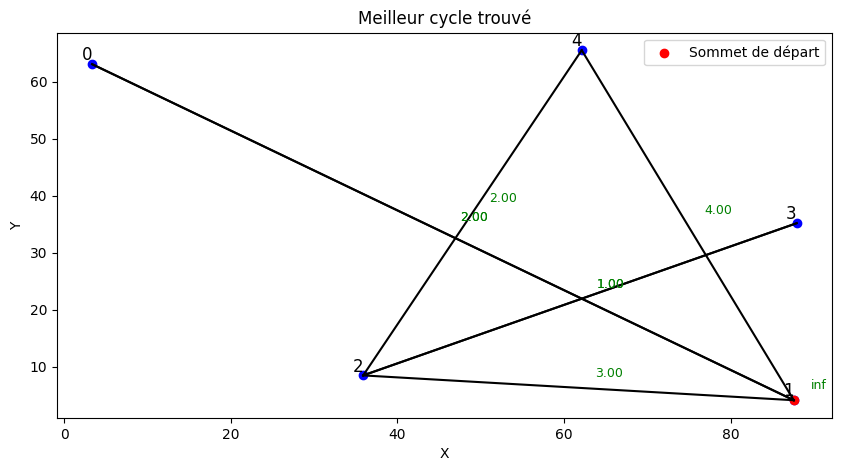

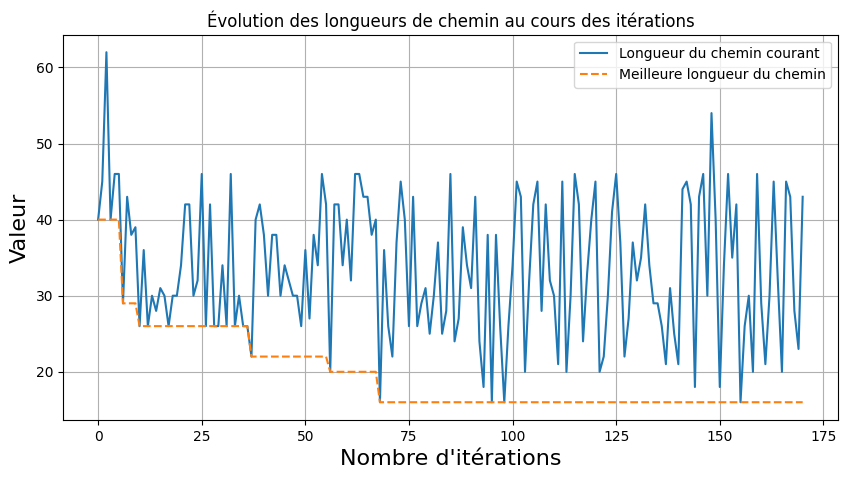

In [632]:
best_path, best_path_length, path_lengths, best_path_lengths , execution_time   = ant_colony_optimization(tsp_matrice, tsp_intervalles)
# Génération de points aléatoires pour la visualisation du graphe
points = np.random.rand(num_sommets, 2) * 100
print(f"Meilleur chemin trouvé : {best_path} avec un temps de trajet de {best_path_length:.2f}")
# Plot the best route
if best_path:
    plot_route(best_path, points, tsp_matrice)
    plot_vi(path_lengths, best_path_lengths)

### Algorithme Hill Climbing

**Fonction calculate_cost**

In [633]:
def calculate_cost(solution, matrice):
    cost = 0
    for i in range(len(solution) - 1):
        cost += matrice[solution[i]][solution[i + 1]]
    return cost


**Fonction is_within_intervals**

In [634]:
def is_within_intervals(tour, intervalles):
    for i in range(len(tour)):
        visit_time = i
        interval_start, interval_end = intervalles[tour[i]]
        if not (interval_start <= visit_time <= interval_end):
            return False
    return True

**Fonction generate_neighbor**

In [635]:
def generate_neighbor(tour, matrice, intervalles):
    attempts = 0
    max_attempts = 100  # Early termination threshold
    while attempts < max_attempts:
        i, j = random.sample(range(len(tour)), 2)
        tour[i], tour[j] = tour[j], tour[i]
        if calculate_cost(tour, matrice) != float('inf') and is_within_intervals(tour, intervalles):
            return tour
        attempts += 1
    return tour

**implementation Hill Climbing**

In [636]:
def hill_climbing(matrice, intervalles, max_iterations=1000):
    num_sommets = len(matrice)
    max_initial_attempts = 1000
    attempts = 0
    path_lengths = []
    best_path_lengths = []

    start_time = time.time()

    while attempts < max_initial_attempts:
        current_solution = list(range(num_sommets)) + list(np.random.choice(range(num_sommets), size=num_sommets, replace=True))
        random.shuffle(current_solution)

        if calculate_cost(current_solution, matrice) != float('inf') and is_within_intervals(current_solution, intervalles):
            break

        attempts += 1

    if attempts == max_initial_attempts:
        end_time = time.time()
        difference_time = end_time - start_time
        return None, float('inf'), [], [], difference_time

    current_cost = calculate_cost(current_solution, matrice)
    best_cost = current_cost

    for _ in range(max_iterations):
        neighbor = generate_neighbor(current_solution.copy(), matrice, intervalles)
        neighbor_cost = calculate_cost(neighbor, matrice)

        if neighbor_cost < current_cost and is_within_intervals(neighbor, intervalles):
            current_solution = neighbor
            current_cost = neighbor_cost

        path_lengths.append(current_cost)
    if current_solution[0] != current_solution[-1]:
        current_solution.append(current_solution[0])
        current_cost = calculate_cost(current_solution, matrice)


        if current_cost < best_cost:
            best_cost = current_cost

        best_path_lengths.append(best_cost)
    end_time = time.time()
    execution_time = end_time - start_time

    return current_solution, current_cost, path_lengths, best_path_lengths , execution_time

**Solution**

{0: (0, 6), 1: (1, 76), 2: (1, 93), 3: (0, 92), 4: (1, 73)}
[[inf  2. inf  6. inf]
 [ 2. inf  3.  5.  4.]
 [inf  3. inf  1.  2.]
 [ 6.  5.  1. inf inf]
 [inf  4.  2. inf inf]]


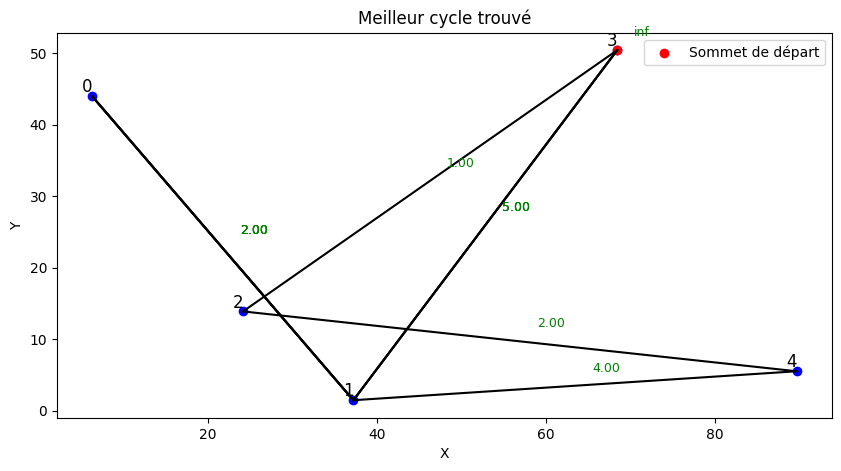

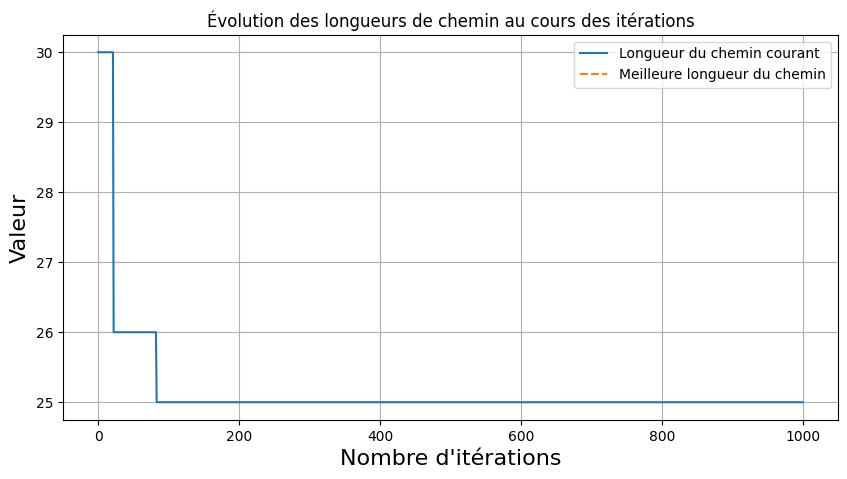

Meilleur chemin: [3, 1, 0, 1, 0, 1, 4, 2, 3, 1, 3]
Longueur de chemin: 30.0


In [637]:
solution, cost, path_lengths, best_path_lengths , execution_time = hill_climbing(tsp_matrice, tsp_intervalles)

print(tsp_intervalles)
print(tsp_matrice)

if solution:
    points = np.random.rand(num_sommets, 2) * 100
    plot_route(solution, points, tsp_matrice)
    plot_vi(path_lengths, best_path_lengths)
    print("Meilleur chemin:", solution)
    print("Longueur de chemin:", cost)
else:
    print("Pas de solution pour ce graph !")


## Etude statistique


Nous voulons maintenant faire des études sur la performance des méthodes implémentées. Afin d'effectuer des études sur la variation des qualités de solutions fournies, nous prenons, à chaque variation, la moyenne des réponses données pour les cents même instances.

Nous générons les cents instances de test:

Generation des instances

In [638]:
#Parametres de test
nb_test = 100
matrices_test = {}
intervalles_test = {}

#Creation des instances de test
for i in range(nb_test):
    matrice, intervalle = generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup)
    matrices_test[i] = matrice
    intervalles_test[i] = intervalle

print(matrices_test[0], matrices_test[1])

[[inf  3.  1. inf  4.]
 [ 3. inf  3. inf  3.]
 [ 1.  3. inf  1. inf]
 [inf inf  1. inf inf]
 [ 4.  3. inf inf inf]] [[inf  2.  2.  2.  4.]
 [ 2. inf inf  6.  1.]
 [ 2. inf inf inf  6.]
 [ 2.  6. inf inf  7.]
 [ 4.  1.  6.  7. inf]]


### Etude de colonie de fourmis

Nous allons faire des études sur les paramètres de la colonie de fourmis dont le taux d'évaporation et la constante de phéromones. En effet, nous considerons qu'ils ont le plus d'impact sur la diversification et l'intensification de l'algorithme.

**Etude sur le taux d'évaporation**

In [639]:
# paramètres du test
evaporation_min = 0
evaporation_max = 1

def plot_evaporation_test():
    # on affiche la barre de progression
    nb_steps_bar = 10*nb_test
    bar = IntProgress(min=0, max=nb_steps_bar, layout={"width" : "100%"})
    display(bar)

    # pour stocker les résultats
    moyennes_distances   = []
    moyennes_temps = []
    deviations = []

    evaporation_rate = evaporation_min

    # cette fois on boucle sur la taille de la liste tabou
    while evaporation_rate <= evaporation_max:
        bornes = deque(())
        temps = deque(())
        i = 0
        while i < nb_test:
            tsp_matrice = matrices_test[i]
            tsp_intervalles = intervalles_test[i]
            best_path, best_path_length, path_lengths, best_path_lengths, execution_time = ant_colony_optimization(tsp_matrice, tsp_intervalles)
            bornes.append(best_path_length)
            temps.append(execution_time)
            bar.value += 1
            i +=1
        evaporation_rate += 0.1

        moyennes_distances.append(statistics.fmean(bornes))
        moyennes_temps.append(statistics.fmean(temps))
        deviations.append(np.std(bornes))

    # on cache la barre de progression
    bar.close()

    # Créer une échelle d'abscisse normalisée de 0 à 1
    x_values = [i / (len(moyennes_distances) - 1) for i in range(len(moyennes_distances))]

    # affichage de la courbe de distances moyennes
    plt.plot(x_values, moyennes_distances)

    # affichage de la bande d'écart-type
    plt.fill_between(x_values,
                     np.subtract(moyennes_distances, deviations), # borne haute
                     np.add(moyennes_distances, deviations),      # borne basse
                     alpha=.1)                          # transparence
    plt.xlabel("évaporation")
    plt.ylabel("distance moyenne trouvée")
    plt.title("Impact de l'évaporation sur la qualité des solutions")
    plt.show()

    # affichage de la courbe de temps d'execution moyens
    plt.plot(x_values, moyennes_temps)
    plt.xlabel("évaporation")
    plt.ylabel("temps d'execution moyen")
    plt.title("Impact de l'évaporation sur le temps d'execution")
    plt.show()

plot_evaporation_test()

IntProgress(value=0, layout=Layout(width='100%'), max=1000)

KeyboardInterrupt: 

En prenant les résultats de cette études faits précedemment, nous avons ces résultats:


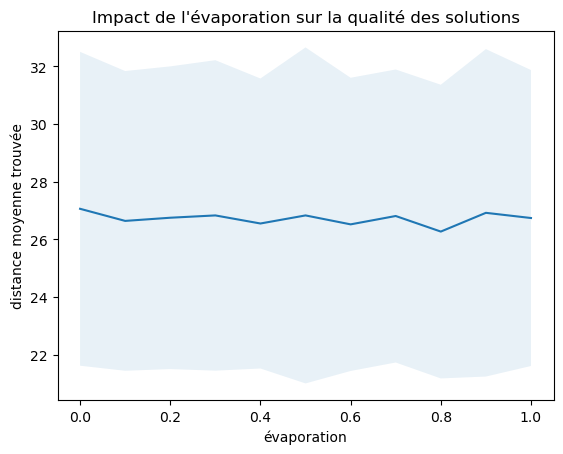


Figure 4: Impact de l'évaporation sur la qualité des solutions

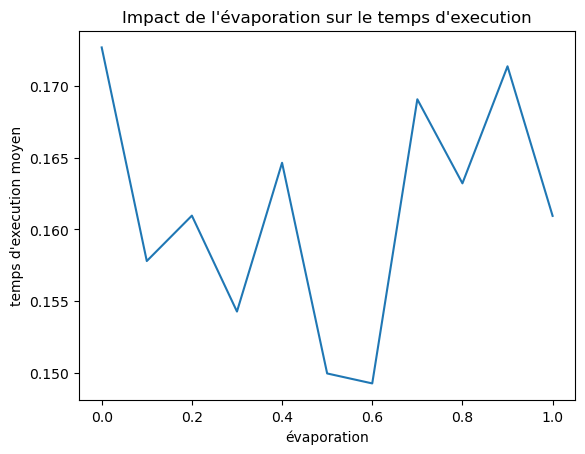

Figure 5 : Impact de l'évaporation sur le temps d'exécution

Nous voyons qu'augmenter l'évaporation améliore faiblement les solutions avant d'atteindre 0.9 où ça empire. D'autre part, pour le temps d'exécution, il y a une grande amélioration qui est annulée à partir de 0,7. Il n'y pas trop d'impact sur la solution. Nous pensons que ceci est du au fait que la méthode s'occupe elle-même de la diversification avec le changement de sommet aléatoirement pour chaque fourmis. Cependant, la faible amélioration montre qu'on s'éloigne des optimums locaux. Le fait que ça s'empire est du au fait qu'on change de chemin avant d'atteindre ou se rapprocher de l'optimum globale.

In [ ]:
# Retour aux conditions précédentes
evaporation_rate = 0.5

**Etude sur la constante de phéromone**

In [ ]:
# paramètres du test
pheromone_min = 1
pheromone_max = 500

def plot_pheromone_test():
    # on affiche la barre de progression
    nb_steps_bar = (pheromone_max - pheromone_min)*nb_test
    bar = IntProgress(min=0, max=nb_steps_bar, layout={"width" : "100%"})
    display(bar)

    # pour stocker les résultats
    moyennes_distances   = []
    moyennes_temps = []
    deviations = []

    random.seed(a=3)

    pheromone_constant = pheromone_min
    for pheromone_constant in range(pheromone_min, pheromone_max):
        bornes = deque(())
        temps = deque(())
        i = 0
        while i < nb_test:
            tsp_matrice = matrices_test[i]
            tsp_intervalles = intervalles_test[i]
            best_path, best_path_length, path_lengths, best_path_lengths, execution_time = ant_colony_optimization(tsp_matrice,tsp_intervalles)
            bornes.append(best_path_length)
            temps.append(execution_time)
            bar.value += 1
            i +=1

        moyennes_distances.append(statistics.fmean(bornes))
        moyennes_temps.append(statistics.fmean(temps))
        deviations.append(np.std(bornes))

    # on cache la barre de progression
    bar.close()

    x_values = [(i / (len(moyennes_distances) - 1)) * (500 - 1) for i in range(len(moyennes_distances))]

    # affichage de la courbe de moyenne
    plt.plot(x_values, moyennes_distances)

    # affichage de la bande d'écart-type
    plt.fill_between(x_values,
                    np.subtract(moyennes_distances, deviations), # borne haute
                    np.add(moyennes_distances, deviations),      # borne basse
                    alpha=.1)                          # transparence
    plt.xlabel("constante de phéromones")
    plt.ylabel("distance moyenne trouvée")
    plt.title("Impact de la constante de phéromones sur les solutions")
    plt.show()

    # affichage de la courbe de temps d'execution moyens
    plt.plot(x_values, moyennes_temps)
    plt.xlabel("constante de phéromones")
    plt.ylabel("temps d'execution moyen")
    plt.title("Impact de la constante de phéromones sur le temps d'execution")
    plt.show()

plot_pheromone_test()

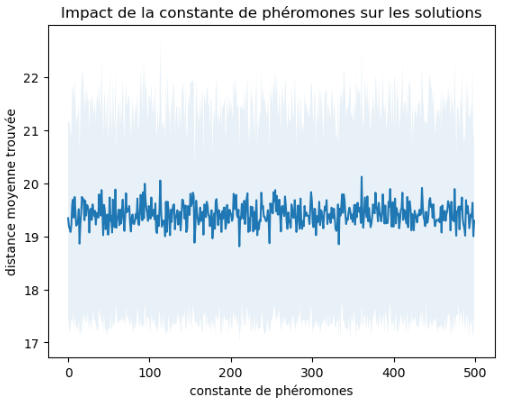

Figure 6: Impact de la constante de phéromone sur les solutions

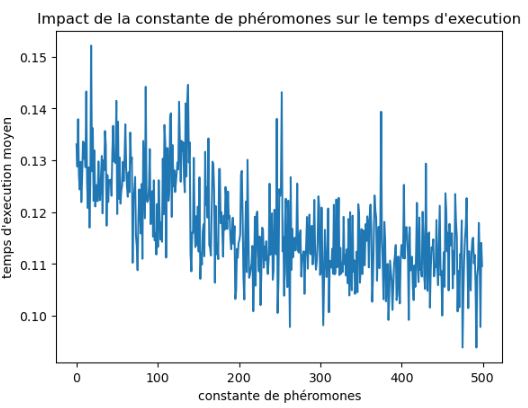

Figure 7: Impact de la constante de phéromone sur le temps d'exécution

Nous voyons que la constante de phéromone n'a pas d'impact visible sur la qualité des solutions mais affecte énormément le temps d'exécution; plus la constante augmente, moins le temps d'exécution est important. Nous pensons que ceci est parce qu'il y a très peu de solutions admissibles dans un graphe qui permet d'améliorer la qualité donc, même sans une grande intensification, les fourmis arrivent à parcourrir la plupart des solutions optimales. Cependant, avec la constante de phéromone élevée, les fourmis sélectionnent les bons sommets plus rapidement.

In [640]:
# Retour aux conditions précédentes
pheromone_constant = 100

**Etude en fonction du nombre de sommets**

In [641]:
def plot_taille_matrice_test(sommets):
    # on affiche la barre de progression
    nb_steps_bar = (len(sommets))*nb_test
    bar = IntProgress(min=0, max=nb_steps_bar, layout={"width" : "100%"})
    display(bar)

    # pour stocker les résultats
    moyennes_distances   = []
    meilleur_temps = []
    pire_temps = []
    moyennes_temps = []
    deviations = []

    for num_sommets in sommets:
        bornes = deque(())
        temps = deque(())
        i = 0
        duree_mieux = float('inf')
        duree_pire = 0.0
        while i < nb_test:
            tsp_matrice, tsp_intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup)
            print(i, end= ' ',  flush=True)
            best_path, best_path_length, path_lengths, best_path_lengths, execution_time = ant_colony_optimization(tsp_matrice, tsp_intervalles)
            bornes.append(best_path_length)
            temps.append(execution_time)
            duree_mieux = min(duree_mieux, execution_time)
            duree_pire = max(duree_pire, execution_time)
            bar.value += 1
            i +=1

        moyennes_distances.append(statistics.fmean(bornes))
        moyennes_temps.append(statistics.fmean(temps))
        meilleur_temps.append(duree_mieux)
        pire_temps.append(duree_pire)
        deviations.append(np.std(bornes))
        print("/r")
        print(num_sommets)
        print("/r")

    # on cache la barre de progression
    bar.close()

    x_values = sommets

    # affichage de la courbe de moyenne
    plt.plot(x_values, moyennes_distances)

    # affichage de la bande d'écart-type
    plt.fill_between(x_values,
                    np.subtract(moyennes_distances, deviations), # borne haute
                    np.add(moyennes_distances, deviations),      # borne basse
                    alpha=.1)                                    # transparence
    plt.xlabel("Nombres de villes")
    plt.ylabel("Distance moyenne trouvée")
    plt.title("Impact du nombre de ville sur les solutions")
    plt.show()


    # affichage des courbes de temps d'execution
    plt.plot(x_values, moyennes_temps,   label=' durée moyenne')
    plt.plot(x_values, meilleur_temps, label='durée au mieux')
    plt.plot(x_values, pire_temps,  label='durée au pire')
    plt.xlabel("Nombres de villes")
    plt.ylabel("temps d'execution")
    plt.title("Impact du nombre de ville sur le temps d'execution")
    plt.show()

#Afin de diminuer le temps d'exécution
nb_test = 50

#Afin d'assurer qu'il y ait toujours une solution possible
max_intervalle_sup = 1000

plot_taille_matrice_test([2, 5, 10, 15, 25, 35, 50])

IntProgress(value=0, layout=Layout(width='100%'), max=350)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 /r
2
/r
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 

KeyboardInterrupt: 

La deuxième courbe devrait bien correspond à la complexité temporelle de l'algorithme. En effet, pour chaque itération, la complexité de construction de chemins est $O(m *n^2)$ avec n le nombre de sommets et m le nombre de fourmis. D'autre part, la mise à jour de phéromone se fait en $O(n)$. Donc pour k itérations, nous avons une complexité de $O(k * (m*n^2 + n)) $ ou $O(k * m*n^2) $. La fonction a donc une complexité de $O(n^2)$ puisque les variables k et m sont déjà déterminées.

### Etude de Hill Climbing

**Generation des instances**

In [ ]:
#Parametres de test
nb_test = 100
matrices_test = {}
intervalles_test = {}

#Creation des instances de test
for i in range(nb_test):
    matrice, intervalle = generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup)
    matrices_test[i] = matrice
    intervalles_test[i] = intervalle

print(matrices_test[0], matrices_test[1])

In [ ]:
# Results storage
results = []

for i in range(nb_test):
    matrice = matrices_test[i]
    intervalles = intervalles_test[i]
    result = hill_climbing(matrice, intervalles)
    results.append(result)

# Example: print results for the first test case
print(results[0])

In [ ]:
_, _, path_lengths, best_path_lengths, _  = results[0]

iterations = range(len(path_lengths))

plt.plot(iterations, path_lengths, label='Longeur de chemin ')
plt.plot(iterations, best_path_lengths, label='Meilleur longeur de chemin',linestyle='--')
plt.xlabel('Nombre des iterations')
plt.ylabel('Cout')
plt.title('Longueurs de Chemin vs Meilleures Longueurs de Chemin pour la Première Instance de Test')
plt.legend()
plt.show()

**Temps d'Exécution en Fonction du Nombre de Sommets**

In [ ]:
def plot_execution_time_vs_sommets(sommets_list, execution_times):
    plt.plot(sommets_list, execution_times, marker='o')
    plt.xlabel('Nombre de Sommets')
    plt.ylabel("Temps d'Exécution (secondes)")
    plt.title("Temps d'Exécution en Fonction du Nombre de Sommets")
    plt.grid(True)
    plt.show()

**Usage**

In [ ]:
# Usage
num_sommets = 5
max_poids_arete = 10
max_intervalle_inf = 1
max_intervalle_sup = 100
sommets_list = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
execution_times = []
for num_sommets in sommets_list:
    matrice, intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup)
    result = hill_climbing(matrice, intervalles)
    execution_times.append(result[4])
plot_execution_time_vs_sommets(sommets_list, execution_times)

### Etude de complexité

IntProgress(value=0, layout=Layout(width='100%'), max=350)

0 1 2 3 4 5 Hill Climbing didn't find a solution for 2 cities in iteration 5.
6 7 8 9 10 Hill Climbing didn't find a solution for 2 cities in iteration 10.
11 12 13 Hill Climbing didn't find a solution for 2 cities in iteration 13.
14 15 16 17 18 Hill Climbing didn't find a solution for 2 cities in iteration 18.
19 20 Hill Climbing didn't find a solution for 2 cities in iteration 20.
21 22 23 24 25 26 27 Hill Climbing didn't find a solution for 2 cities in iteration 27.
28 29 Hill Climbing didn't find a solution for 2 cities in iteration 29.
30 31 32 Hill Climbing didn't find a solution for 2 cities in iteration 32.
33 34 35 36 37 38 39 40 41 42 43 Hill Climbing didn't find a solution for 2 cities in iteration 43.
44 45 46 Hill Climbing didn't find a solution for 2 cities in iteration 46.
47 Hill Climbing didn't find a solution for 2 cities in iteration 47.
48 Hill Climbing didn't find a solution for 2 cities in iteration 48.
49 
2

0 

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


1 2 Hill Climbing didn't find a solution for 5 cities in iteration 2.
3 4 5 6 7 8 9 10 11 Hill Climbing didn't find a solution for 5 cities in iteration 11.
12 13 14 15 16 17 Hill Climbing didn't find a solution for 5 cities in iteration 17.
18 19 20 Hill Climbing didn't find a solution for 5 cities in iteration 20.
21 22 23 24 Hill Climbing didn't find a solution for 5 cities in iteration 24.
25 Hill Climbing didn't find a solution for 5 cities in iteration 25.
26 27 28 29 30 31 Hill Climbing didn't find a solution for 5 cities in iteration 31.
32 33 34 Hill Climbing didn't find a solution for 5 cities in iteration 34.
35 36 Hill Climbing didn't find a solution for 5 cities in iteration 36.
37 38 39 Hill Climbing didn't find a solution for 5 cities in iteration 39.
40 41 42 43 Hill Climbing didn't find a solution for 5 cities in iteration 43.
44 45 46 47 48 49 
5

0 Hill Climbing didn't find a solution for 10 cities in iteration 0.
1 Hill Climbing didn't find a solution for 10 cities 

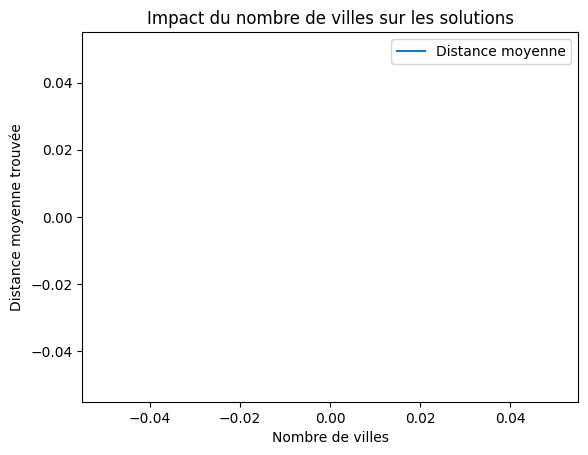

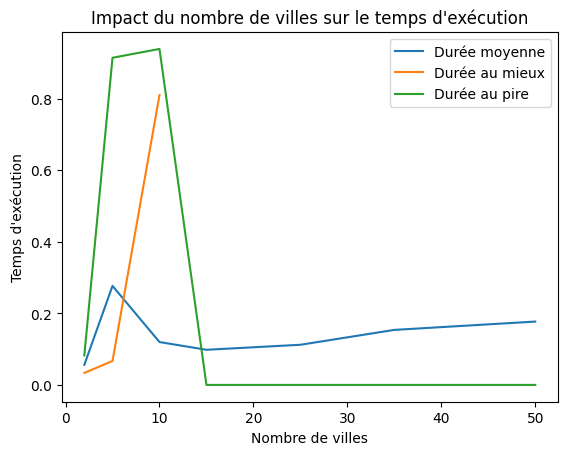

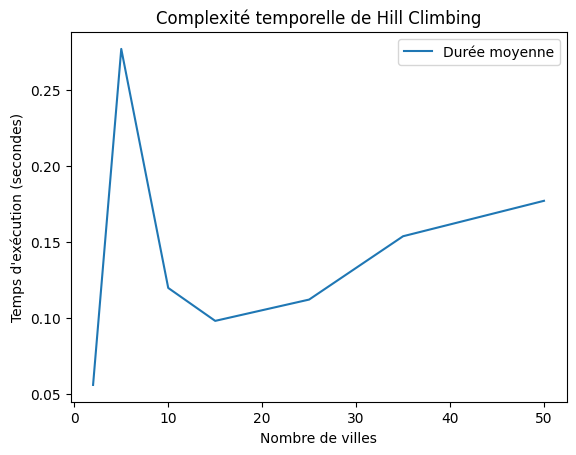

In [642]:
def plot_taille_matrice_test(sommets):
    # on affiche la barre de progression
    nb_steps_bar = (len(sommets)) * nb_test
    bar = IntProgress(min=0, max=nb_steps_bar, layout={"width": "100%"})
    display(bar)

    # pour stocker les résultats
    moyennes_distances = []
    meilleur_temps = []
    pire_temps = []
    moyennes_temps = []
    deviations = []

    for num_sommets in sommets:
        bornes = deque(())
        temps = deque(())
        i = 0
        duree_mieux = float('inf')
        duree_pire = 0.0
        while i < nb_test:
            tsp_matrice, tsp_intervalles = generate_tsp_incomplete(num_sommets, max_poids_arete, max_intervalle_inf, max_intervalle_sup)
            print(i, end=' ', flush=True)
            best_path, best_path_length, path_lengths, best_path_lengths, execution_time = hill_climbing(tsp_matrice, tsp_intervalles)

            if best_path is None:
                print(f"Hill Climbing didn't find a solution for {num_sommets} cities in iteration {i}.")
                bornes.append(float('inf'))
                temps.append(execution_time)
                i += 1
                bar.value += 1
                continue

            bornes.append(best_path_length)
            temps.append(execution_time)
            duree_mieux = min(duree_mieux, execution_time)
            duree_pire = max(duree_pire, execution_time)
            bar.value += 1
            i += 1

        moyennes_distances.append(statistics.fmean(bornes))
        moyennes_temps.append(statistics.fmean(temps))
        meilleur_temps.append(duree_mieux)
        pire_temps.append(duree_pire)
        deviations.append(np.std(bornes))
        print("\r")
        print(num_sommets)
        print("\r")

    # on cache la barre de progression
    bar.close()

    x_values = sommets

    # affichage de la courbe de moyenne
    plt.plot(x_values, moyennes_distances, label='Distance moyenne')

    # affichage de la bande d'écart-type
    plt.fill_between(x_values,
                     np.subtract(moyennes_distances, deviations),  # borne haute
                     np.add(moyennes_distances, deviations),       # borne basse
                     alpha=.1)                                     # transparence
    plt.xlabel("Nombre de villes")
    plt.ylabel("Distance moyenne trouvée")
    plt.title("Impact du nombre de villes sur les solutions")
    plt.legend()
    plt.show()

    # affichage des courbes de temps d'exécution
    plt.plot(x_values, moyennes_temps, label='Durée moyenne')
    plt.plot(x_values, meilleur_temps, label='Durée au mieux')
    plt.plot(x_values, pire_temps, label='Durée au pire')
    plt.xlabel("Nombre de villes")
    plt.ylabel("Temps d'exécution")
    plt.title("Impact du nombre de villes sur le temps d'exécution")
    plt.legend()
    plt.show()

    # Tracé de la complexité temporelle
    plt.plot(x_values, moyennes_temps, label='Durée moyenne')
    plt.xlabel("Nombre de villes")
    plt.ylabel("Temps d'exécution (secondes)")
    plt.title("Complexité temporelle de Hill Climbing")
    plt.legend()
    plt.show()

nb_test = 50
max_intervalle_sup = 1000

plot_taille_matrice_test([2, 5, 10, 15, 25, 35, 50])

### Comparison des deux algorithmes

In [643]:
def compare_algorithms(iterations=30, num_ants=10, num_iterations_aco=100, alpha=1.0, beta=5.0, evaporation_rate=0.5, Q=100):
    hc_costs = []
    hc_times = []
    aco_costs = []
    aco_times = []

    for _ in range(iterations):
        # Hill Climbing
        start_time = time.time()
        hc_solution, hc_cost, _, _, hc_exec_time = hill_climbing(tsp_matrice, tsp_intervalles)
        end_time = time.time()
        hc_times.append(hc_exec_time)
        if hc_solution is not None:
            hc_costs.append(hc_cost)
        else:
            print("Hill Climbing n'a pas trouve une solution !")

        # ACO
        start_time = time.time()
        _, aco_cost, _, _, aco_exec_time = ant_colony_optimization(tsp_matrice, tsp_intervalles)
        end_time = time.time()
        aco_times.append(aco_exec_time)
        aco_costs.append(aco_cost)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(hc_times, hc_costs, color='blue', label='Hill Climbing')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Cost')
    plt.title('Hill Climbing: ')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(aco_times, aco_costs, color='red', label='ACO')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Cost')
    plt.title('ACO: Cost vs Time')
    plt.legend()

    plt.suptitle('Comparison of Hill Climbing and ACO')
    plt.show()

Hill Climbing n'a pas trouve une solution !
Hill Climbing n'a pas trouve une solution !
Hill Climbing n'a pas trouve une solution !
Hill Climbing n'a pas trouve une solution !
Hill Climbing n'a pas trouve une solution !
Hill Climbing n'a pas trouve une solution !


ValueError: x and y must be the same size

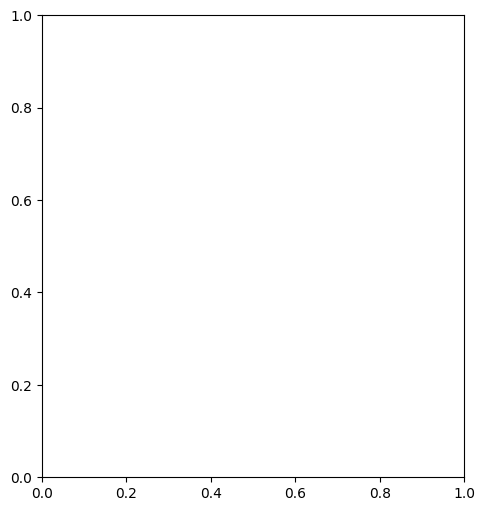

In [645]:
compare_algorithms(iterations=30, num_ants=10, num_iterations_aco=100, alpha=1.0, beta=5.0, evaporation_rate=0.5, Q=100)

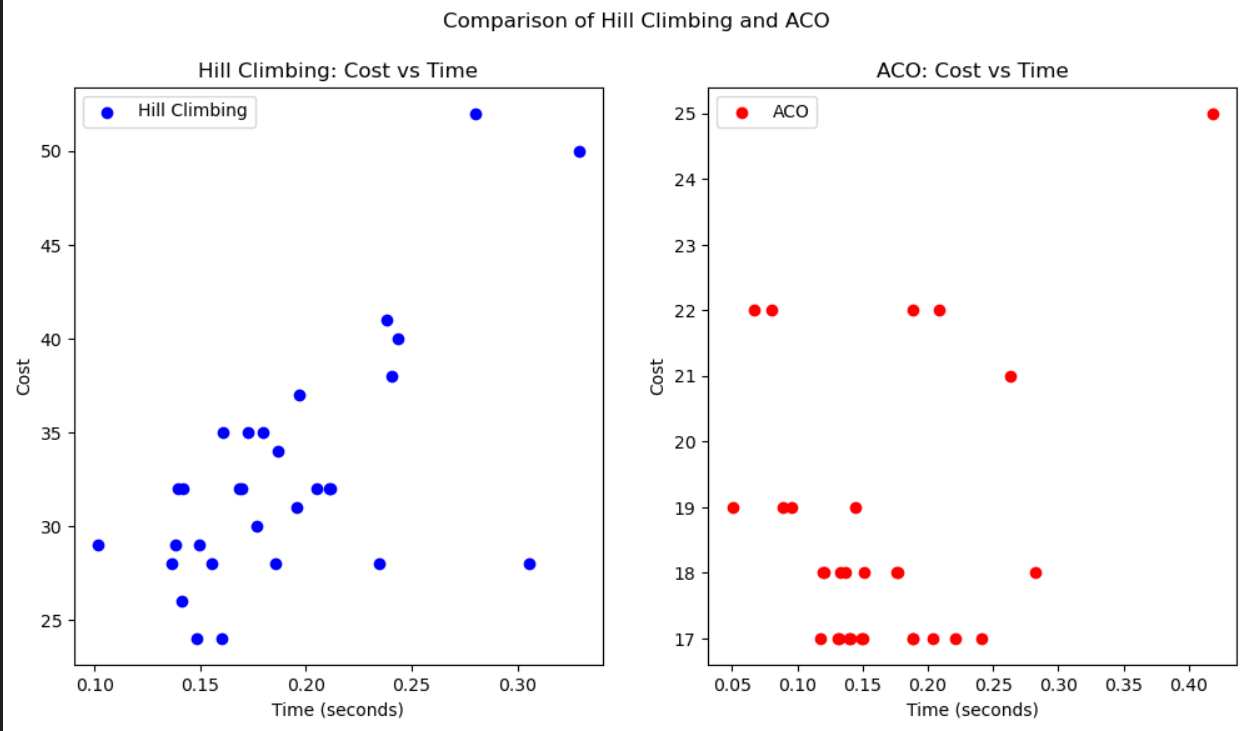

Figure 8: Comparaison du résultat en fonction du temps d'exéction entre les deux implémentations

Nous voyons donc que le programme de colonie de fourmis trouve de meilleures solutions en un moins de temps que celle du hill climbing. De plus, le programme de colonie de fourmis trouve plus souvent une solution que le hill climbing.

## Conclusion

### Bilan de groupe

Pendant ce projet, nous avons énoncé formellement le problème à résoudre pour répondre à la demande de l'ADEME. Nous avons ensuite montré que le problème est de classe NP-Complet ce qui nous a mené à penser aux heuristiques et métaheuristiques. Nous avons donc choisi d'implémenter les algorithmes de hill-climbing et de colonies de fourmis et nous avons effectué des études sur leur fonctionnement. Nous concluons donc que l'algorithme colonie de fourmis est mieux adapté à ce problème.

### Bilans individuels



**Mohamed Amine ELBAH :** Dans ce livrable, j'ai mis en œuvre la méthode de Hill Climbing et effectué une étude approfondie sur les algorithmes heuristiques et méta-heuristiques. Ce domaine m'intéresse particulièrement et j'envisage de me spécialiser en sciences des données pour devenir un spécialiste et mieux comprendre ces techniques. Au cours de ce projet, j'ai acquis de nombreuses notions qui m'aideront dans mon parcours académique.

**Ahmad ZIAB**:   Dans ce livrable, j'ai contribué à la définition du problème du Voyageur de Commerce avec fenêtres de livraison, ainsi qu'à la démonstration de sa complexité NP-difficile. J'ai exploré et expliqué les approches heuristiques et métaheuristiques pour résoudre ce problème, mettant en pratique les concepts théoriques et algorithmiques abordés précédemment.


**Sarah KOMBAR** : Dans ce livrable, j'ai fait l'implémentation de la méthode de colonie des fourmis avec les études associées. J'ai vraiment apprécié l'aspect formel de ce projet et les études statistiques. je pense avoir mieux saisi les notions du blocs en travaillnat sur ce projet avec mes camarades.

## Table de Figures

**Figure 1:** Exemple d'un graphe complet pondéré [2]

**Figure 2:** Exemple de réduction polynomiale du Cycle Hamiltonien à Notre Problème

**Figure 3:** Types des algorithmes métaheuristiques

**Figure 4:** Impact de l'évaporation sur la qualité de la solution

**Figure 5:** Impact de l'évaporation sur le temps d'exécution

**Figure 6:** Impact de la constante de phéromone sur les solutions

**Figure 7:** Impact de la constante de phéromone sur le temps d'exécution

**Figure 8:** Comparaison du résultat en fonction du temps d'exéction entre les deux implémentations

## Bibliographie

[1] Définition de Chaîne , cycle et graphe hamiltonien https://fr.wikipedia.org/wiki/Graphe_hamiltonien

[2] Définition de problème des voyageurs de commerce https://interstices.info/le-probleme-du-voyageur-de-commerce/

[3] Définition de problème des voyageurs de commerce https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce

[4] Propriété sur la longueur d'un cycle Hamiltonien (première page) https://www.lirmm.fr/~bessy/GraphesStructM1/NotesCours.pdf

[5] Preuve sur la NP-Complétude du Cycle Hamiltonien https://www.geeksforgeeks.org/proof-that-hamiltonian-cycle-is-np-complete/

[6] Définition d'algorithme heuristique https://fr.wikipedia.org/wiki/Heuristique_(math%C3%A9matiques)

[7] Défintion d'alogrithme Métaheuristique https://www.metaheuristics.org/ , https://fr.wikipedia.org/wiki/M%C3%A9taheuristique

[8] Défintion d'algorithme Hill Climbing https://www.geeksforgeeks.org/introduction-hill-climbing-artificial-intelligence/

[9] Défintion optimisation par colonies de fourmis  **Hao, Jin-Kao and Solnon, Christine.** *Méta-heuristiques*.

[10] Défintion optimisation par colonies de fourmis **Ines Alaya, Christine Solnon, Khaled Ghedira.** *Optimisation par colonies de fourmis pour le problème
du sac-à-dos multi-dimensionnel. Revue des Sciences et Technologies de l’Information - Série TSI :
Technique et Science Informatiques, 2007, 3-4, 26, pp.371-390. ffhal-01542507f*